In [79]:
import mysql.connector
import pandas as pd
import seaborn as sns
from IPython.display import HTML
import base64
from io import BytesIO
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2


In [80]:
%pip install mysql-connector-python pandas


3707.23s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [81]:
print("Antes de começar, executar 'sudo docker-compose up --build' nesta pasta")
print("Caso não queira, basta usar o endereõ de ip que estáhospedando o docker na rede interna.")
host = input("digite o endereço para hospedagem: ")

Antes de começar, executar 'sudo docker-compose up --build' nesta pasta
Caso não queira, basta usar o endereõ de ip que estáhospedando o docker na rede interna.


O que escrever no documento:

Documento, entre 5 e 10 páginas, relatório do que foi feito e justificar

In [82]:
db_config = {
    'host': host,  # Endereço do MySQL no Docker (localhost ou o IP do contêiner), no caso do meu notebook é 192.168.137.4
    'port': 3306,         # Porta do MySQL
    'user': 'root',       # Usuário do MySQL
    'password': 'rootpassword',  # Senha configurada no Docker
    'database': 'N3'      # Nome do banco de dados
}
connection = mysql.connector.connect(**db_config)
query = "SELECT * FROM consumo_energia_eletrica;"
df = pd.read_sql(query, connection)
connection.close()
print(df)


        ano  mes sigla_uf tipo_consumo  numero_consumidores  consumo
0      2004    1       RN       Outros              40857.0    69617
1      2004    1       SP       Outros             311650.0   937538
2      2004    1       MS       Outros              56881.0    67601
3      2004    1       SC       Outros             226165.0   209380
4      2004    1       RJ       Outros              70634.0   416128
...     ...  ...      ...          ...                  ...      ...
25915  2023   12       BA  Residencial            5932740.0   718461
25916  2023   12       PA  Residencial            2614106.0   478726
25917  2023   12       AC  Residencial             245699.0    58301
25918  2023   12       RN  Residencial            1390080.0   210119
25919  2023   12       SC  Residencial            2719791.0   655389

[25920 rows x 6 columns]


/tmp/ipykernel_9644/2328889262.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


In [83]:
df.columns.to_list()

['ano', 'mes', 'sigla_uf', 'tipo_consumo', 'numero_consumidores', 'consumo']

In [84]:
print(df.head())


    ano  mes sigla_uf tipo_consumo  numero_consumidores  consumo
0  2004    1       RN       Outros              40857.0    69617
1  2004    1       SP       Outros             311650.0   937538
2  2004    1       MS       Outros              56881.0    67601
3  2004    1       SC       Outros             226165.0   209380
4  2004    1       RJ       Outros              70634.0   416128


In [85]:
print(df.describe())
print(df.isnull().sum())


                ano           mes  numero_consumidores       consumo
count  25920.000000  25920.000000         2.592000e+04  2.592000e+04
mean    2013.500000      6.500000         6.823034e+05  3.391709e+05
std        5.766393      3.452119         1.839312e+06  6.036427e+05
min     2004.000000      1.000000         5.200000e+01  3.540000e+02
25%     2008.750000      3.750000         1.895650e+04  6.154550e+04
50%     2013.500000      6.500000         1.081745e+05  1.367545e+05
75%     2018.250000      9.250000         4.424120e+05  3.616518e+05
max     2023.000000     12.000000         1.920126e+07  4.849895e+06
ano                    0
mes                    0
sigla_uf               0
tipo_consumo           0
numero_consumidores    0
consumo                0
dtype: int64


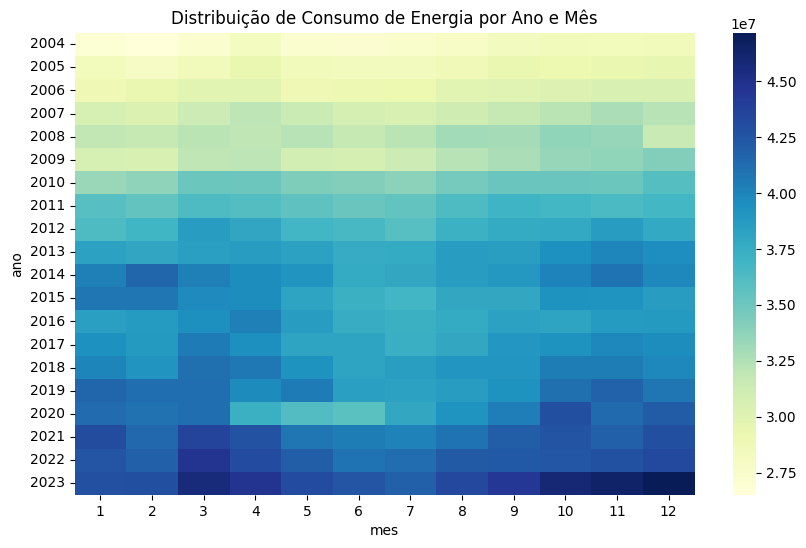

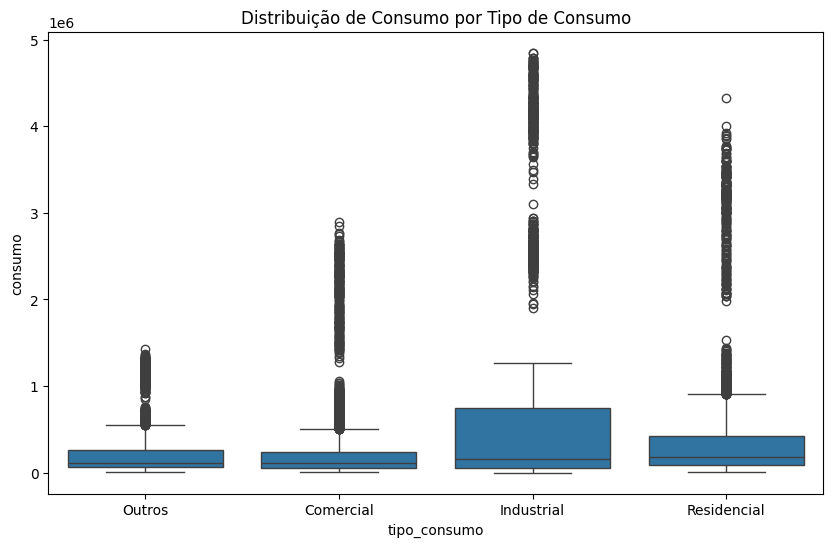

In [86]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.pivot_table(values='consumo', index='ano', columns='mes', aggfunc='sum'), cmap='YlGnBu')
plt.title('Distribuição de Consumo de Energia por Ano e Mês')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='tipo_consumo', y='consumo', data=df)
plt.title('Distribuição de Consumo por Tipo de Consumo')
plt.show()


In [87]:
label_encoder = LabelEncoder()
df['sigla_uf_encoded'] = label_encoder.fit_transform(df['sigla_uf'])
df['tipo_consumo_encoded'] = label_encoder.fit_transform(df['tipo_consumo'])


In [88]:
X = df[['ano', 'mes', 'sigla_uf_encoded', 'tipo_consumo_encoded', 'numero_consumidores']]
y = df['consumo']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [90]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'MSE (Regressão Linear): {mse_lr}')
print(f'R2 (Regressão Linear): {r2_lr}')


MSE (Regressão Linear): 259602195469.6708
R2 (Regressão Linear): 0.30515543196663786


In [91]:
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'MSE (Random Forest): {mse_rf}')
print(f'R2 (Random Forest): {r2_rf}')


MSE (Random Forest): 883081775.7618694
R2 (Random Forest): 0.9976363660025784


Como o Random Forest Funciona Internamente:
Ensemble Learning: Random Forest é uma técnica de ensemble learning que combina múltiplos modelos (árvores de decisão, neste caso) para melhorar a precisão e reduzir o overfitting.

Árvores de Decisão: Cada árvore de decisão é treinada em um subconjunto aleatório dos dados. As divisões nas árvores são feitas de forma que cada árvore possa aprender de diferentes aspectos dos dados.

Bootstrap Aggregation (Bagging): Random Forest usa amostragem bootstrap, o que significa que cada árvore é treinada em um subconjunto de dados com reposição. Isso ajuda a criar diversas árvores e reduz a variabilidade.

Agregação das Previsões: As previsões finais são feitas agregando (por exemplo, através de média para regressão) as previsões de todas as árvores individuais. Isso tende a produzir previsões mais robustas e precisas do que uma única árvore de decisão.

Isso proporciona uma combinação poderosa de flexibilidade e robustez, tornando o Random Forest uma ferramenta valiosa para muitos tipos de problemas de previsão.

 DIDÁTICA TECH. Entenda como funciona o Random Forest (Machine Learning). 2022. Disponível em: https://didatica.tech/o-que-e-e-como-funciona-o-algoritmo-randomforest/. Acesso em: 19 nov. 2024.



In [92]:
print("sigla uf encoded: \n",df['sigla_uf_encoded'], "\nTipo consumo encoded:\n", df['tipo_consumo_encoded'].tail(10))

sigla uf encoded: 
 0        19
1        25
2        11
3        23
4        18
         ..
25915     4
25916    13
25917     0
25918    19
25919    23
Name: sigla_uf_encoded, Length: 25920, dtype: int64 
Tipo consumo encoded:
 25910    3
25911    3
25912    3
25913    3
25914    3
25915    3
25916    3
25917    3
25918    3
25919    3
Name: tipo_consumo_encoded, dtype: int64


In [93]:
df.tail()

,ano,mes,sigla_uf,tipo_consumo,numero_consumidores,consumo,sigla_uf_encoded,tipo_consumo_encoded
25915,2023,12,BA,Residencial,5932740.0,718461,4,3
25916,2023,12,PA,Residencial,2614106.0,478726,13,3
25917,2023,12,AC,Residencial,245699.0,58301,0,3
25918,2023,12,RN,Residencial,1390080.0,210119,19,3
25919,2023,12,SC,Residencial,2719791.0,655389,23,3


In [94]:
# Dados de entrada para previsão
novos_dados = pd.DataFrame({
    'ano': [2023],
    'mes': [12],
    'sigla_uf_encoded': [23],  # Codificando o estado
    'tipo_consumo_encoded': [3],  # Codificando o tipo de consumo
    'numero_consumidores': [2719791.0]
})

# Prevendo o consumo para os novos dados
consumo_predito = model_rf.predict(novos_dados)
print(f'Consumo previsto: {consumo_predito[0]}')


Consumo previsto: 626948.89


In [95]:
consumo_real = 655389.00
diferenca = consumo_real-consumo_predito
print("Diferença entre consumo real e predito: ", diferenca, " ou seja, uma diferença de", (diferenca*100)/consumo_real,"%")

Diferença entre consumo real e predito:  [28440.11]  ou seja, uma diferença de [4.33942437] %


In [96]:
#outra predção
novos_dados = pd.DataFrame({
    'ano': [2023],
    'mes': [12],
    'sigla_uf_encoded': [19],  # Codificando o estado
    'tipo_consumo_encoded': [3],  # Codificando o tipo de consumo
    'numero_consumidores': [1390080.0]
})

# Prevendo o consumo para os novos dados
consumo_predito = model_rf.predict(novos_dados)
print(f'Consumo previsto: {consumo_predito[0]}')

Consumo previsto: 209598.36


In [97]:
consumo_real = 210119.00
diferenca = consumo_real-consumo_predito
print("Diferença entre consumo real e predito: ", diferenca, " ou seja, uma diferença de", (diferenca*100)/consumo_real,"%")

Diferença entre consumo real e predito:  [520.64]  ou seja, uma diferença de [0.2477834] %


In [98]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=10, validation_split=0.2, verbose=1)
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Rede neural sequencial, com uma camada de entrada, uma oculta e uma de saída relu.")
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
#resultado foi bem ruim

Epoch 1/50


/home/vandelsoncleitoso/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1659/1659 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 481853571072.0000 - mean_absolute_error: 338117.8438 - val_loss: 453546999808.0000 - val_mean_absolute_error: 317584.5000
Epoch 2/50
1659/1659 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 443967537152.0000 - mean_absolute_error: 313183.0625 - val_loss: 391807565824.0000 - val_mean_absolute_error: 279129.0312
Epoch 3/50
1659/1659 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 387009314816.0000 - mean_absolute_error: 277460.8125 - val_loss: 327083982848.0000 - val_mean_absolute_error: 264368.3750
Epoch 4/50
1659/1659 ━━━━━━━━━━━━━━━━━━━━ 1s 774us/step - loss: 336424206336.0000 - mean_absolute_error: 276369.8125 - val_loss: 294776569856.0000 - val_mean_absolute_error: 272681.7500
Epoch 5/50
1659/1659 ━━━━━━━━━━━━━━━━━━━━ 2s 905us/step - loss: 337882546176.0000 - mean_absolute_error: 291471.1250 - val_loss: 281282576384.0000 - val_mean_absolute_error: 279701.0938
Epoch 6/50
1659/1659 ━━━━━━━━━━━━━━━━━━━━ 1s 748us/step - loss: 321415348224.0000 - mea

In [99]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(1)) 

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=1)

y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Rede neural aprimorada:")
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')


Epoch 1/100


/home/vandelsoncleitoso/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1037/1037 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 452638375936.0000 - mean_absolute_error: 321684.1562 - val_loss: 282488832000.0000 - val_mean_absolute_error: 279543.6250
Epoch 2/100
1037/1037 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 297711206400.0000 - mean_absolute_error: 291703.5938 - val_loss: 256733069312.0000 - val_mean_absolute_error: 269920.8438
Epoch 3/100
1037/1037 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 287606571008.0000 - mean_absolute_error: 281677.1562 - val_loss: 248987123712.0000 - val_mean_absolute_error: 257216.6250
Epoch 4/100
1037/1037 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 272811917312.0000 - mean_absolute_error: 266343.1562 - val_loss: 245981298688.0000 - val_mean_absolute_error: 257085.7812
Epoch 5/100
1037/1037 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 299838603264.0000 - mean_absolute_error: 273773.9375 - val_loss: 245000306688.0000 - val_mean_absolute_error: 257206.7031
Epoch 6/100
1037/1037 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 268418940928.0000 - mean

Camada de Entrada:

Dense(128, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.01)):

Dense: Esta é uma camada densamente conectada, onde cada neurônio da camada está conectado a todos os neurônios da camada anterior.

128: Número de neurônios nesta camada.

input_dim=X_train.shape[1]: Define a dimensão de entrada (número de características de entrada). Isso informa à rede o número de entradas para a primeira camada.

activation='relu': Função de ativação ReLU (Rectified Linear Unit). ReLU é usada para introduzir não-linearidade ao modelo, permitindo que ele aprenda relações mais complexas. A fórmula é f(x) = max(0, x).

kernel_regularizer=l2(0.01): Aplica regularização L2 para penalizar pesos grandes, ajudando a prevenir overfitting.

Camada de Dropout:

Dropout(0.2): Dropout é uma técnica de regularização onde, durante o treinamento, uma fração de neurônios (neste caso, 20%) são desligados aleatoriamente em cada iteração. Isso ajuda a prevenir overfitting ao forçar a rede a aprender representações mais robustas das entradas.

Camada Oculta:

Dense(64, activation='relu', kernel_regularizer=l2(0.01)):

64: Número de neurônios nesta camada oculta.

activation='relu': Função de ativação ReLU.

kernel_regularizer=l2(0.01): Regularização L2 para prevenir overfitting.

Outra Camada de Dropout:

Dropout(0.2): Outra camada de Dropout para aumentar a robustez e ajudar a prevenir overfitting.

Camada Oculta Adicional:

Dense(32, activation='relu', kernel_regularizer=l2(0.01)):

32: Número de neurônios nesta camada oculta.

activation='relu': Função de ativação ReLU.

kernel_regularizer=l2(0.01): Regularização L2.

Camada de Saída:

Dense(1):

Dense: Camada densamente conectada.

1: Número de neurônios de saída, uma vez que estamos prevendo um valor contínuo (consumo).

Em resumo, as camadas de entrada e ocultas processam as características de entrada através de transformações lineares seguidas pela aplicação de funções de ativação não-lineares (ReLU), o que permite à rede aprender padrões complexos nos dados. As camadas de Dropout ajudam a prevenir overfitting desligando neurônios aleatoriamente durante o treinamento. A camada de saída gera a previsão final.

In [100]:
print("R² da rede neural: ",r2)
print("R² do random forest: ",r2_rf)
print("R² do linear regression: ",r2_lr)

R² da rede neural:  0.6095644301347916
R² do random forest:  0.9976363660025784
R² do linear regression:  0.30515543196663786


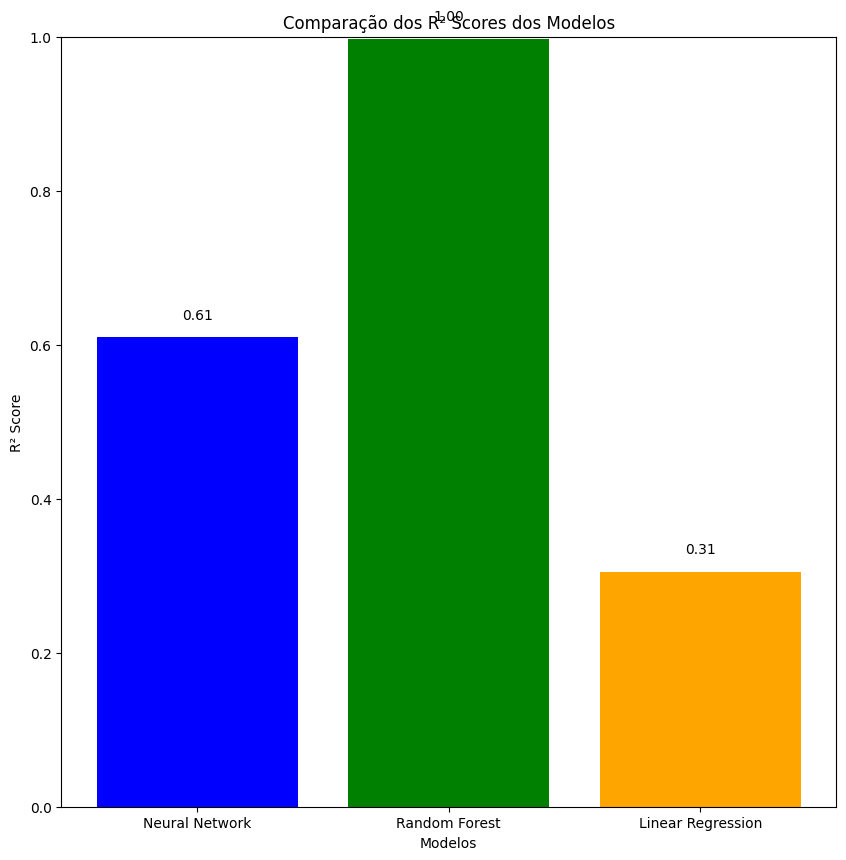

In [101]:
models = ['Neural Network', 'Random Forest', 'Linear Regression']
r2_scores = [r2, r2_rf, r2_lr]

plt.figure(figsize=(10, 10))
plt.bar(models, r2_scores, color=['blue', 'green', 'orange'])
plt.xlabel('Modelos')
plt.ylabel('R² Score')
plt.title('Comparação dos R² Scores dos Modelos')
plt.ylim(0, 1)

for i, v in enumerate(r2_scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom')

# Exibindo o gráfico
plt.show()


Dos 3 métodos utilizados, o Ranfom Forest é o método mais recomendado, pois utiliza poucos recursos, com os melhores resultados.
Foram utilizadas duas instâncias de Redes Neurais, mas os resultados não são tão bons quant os da Random Forest, além de demorar 2 minutos e 37 segundos para executar, enquanto o random forest foi de apenas 7 segundos.
É interessante salientar que o primeiro modelo de rede neural usado teve resultados muito semelhantes aos de uma rede neural.

In [ ]:
def fig_to_html(fig):
    buf = BytesIO()
    fig.savefig(buf, format='png')
    buf.seek(0)
    image_base64 = base64.b64encode(buf.read()).decode('utf-8')
    buf.close()
    return f'<img src="data:image/png;base64,{image_base64}" />'


fig1 = plt.figure(figsize=(10, 6))
sns.heatmap(df.pivot_table(values='consumo', index='ano', columns='mes', aggfunc='sum'), cmap='YlGnBu')
plt.title('Distribuição de Consumo de Energia por Ano e Mês')
plt.close()  


fig2 = plt.figure(figsize=(10, 6))
sns.boxplot(x='tipo_consumo', y='consumo', data=df)
plt.title('Distribuição de Consumo por Tipo de Consumo')
plt.close()  

# Terceiro gráfico
fig3 = plt.figure(figsize=(10, 10))
plt.bar(models, r2_scores, color=['blue', 'green', 'orange'])
plt.xlabel('Modelos')
plt.ylabel('R² Score')
plt.title('Comparação dos R² Scores dos Modelos')
plt.ylim(0, 1)
for i, v in enumerate(r2_scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom')
plt.close() 


html_content = f"""
<html>
<head>
    <link rel="icon" href="favicon.ico" type="image/x-icon">
    <title>Resultados dos Modelos</title>
    <link rel="stylesheet" href="styles.css">
</head>
<body>
    <meta charset="UTF-8">
    <h1>Gráficos e Resultados dos Modelos</h1>
    <h2>Distribuição de Consumo de Energia por Ano e Mês</h2>
    {fig_to_html(fig1)}
    <p>Com isso, é possível ver que o consumo vem aumentando conforme os anos passam.</p>
    <h2>Distribuição de Consumo por Tipo de Consumo</h2>
    {fig_to_html(fig2)}
    <p>Com esse gráfico, é possível observar que as indústrias são as que mais consumem energia elétrica</p>
    <h2>Comparação dos R² Scores dos Modelos</h2>
    {fig_to_html(fig3)}
    <h3>Resultados:</h3>
    <ul>
        <li>R² da Rede Neural: {r2:.2f}</li>
        <li>R² do Random Forest: {r2_rf} (muito próxima de 1)</li>
        <li>R² da Regressão Linear: {r2_lr:.2f}</li>
    </ul>
    <p>Com isso, conclue-se que o modelo de Random Forest foi o que obteve melhores resultados na previsão dos resultados.</p>
</body>
</html>
"""

# Salvar o conteúdo HTML em um arquivo
with open('index.html', 'w') as f:
    f.write(html_content)


#HTML(html_content)
#Retirar o comentário para exibir o conteúdo

In [106]:
!python3 -m http.server && rm index.html
## Inicia o servidor para subir o html, ao encerrar, exclui o html.

4238.54s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Serving HTTP on 0.0.0.0 port 8000 (http://0.0.0.0:8000/) ...
192.168.0.33 - - [19/Nov/2024 15:25:48] "GET / HTTP/1.1" 200 -
192.168.0.33 - - [19/Nov/2024 15:25:48] "GET /styles.css HTTP/1.1" 200 -
^C

Keyboard interrupt received, exiting.


In [104]:
print("Use 'sudo docker-compose down -v', para excluir o docker, se quiser.")

Use 'sudo docker-compose down -v', para excluir o docker, se quiser.
